In [15]:
import pandas as pd
facebook_set = pd.read_csv(r"C:\Users\mvlad\Downloads\facebook_ads_data (2.0).csv")
facebook_set['ad_date'] = pd.to_datetime(facebook_set['ad_date'])

In [3]:
grouped = facebook_set.groupby('ad_date', as_index = False)['total_spend'].sum()
grouped21 = grouped[grouped['ad_date'].dt.year == 2021]

<Axes: xlabel='ad_date'>

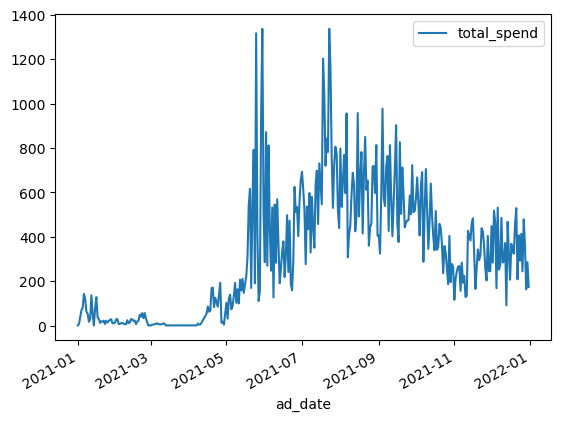

In [57]:
grouped21.plot('ad_date', 'total_spend', 'line')

In [49]:
import matplotlib.pyplot as plt

In [51]:
grouped21_romi = facebook_set[facebook_set['ad_date'].dt.year == 2021].groupby(by = 'ad_date')['romi'].mean()

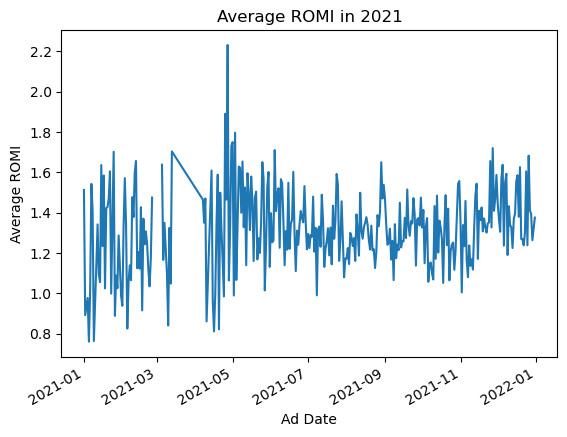

In [53]:

grouped21_romi.plot(kind='line', title='Average ROMI in 2021')
plt.xlabel('Ad Date')
plt.ylabel('Average ROMI')
plt.show()

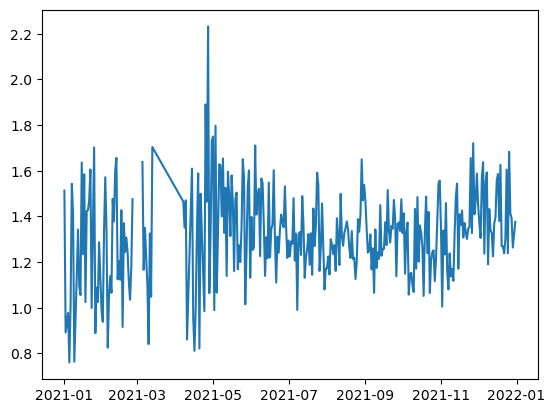

In [47]:
grouped21_romi_indx = facebook_set[facebook_set['ad_date'].dt.year == 2021].groupby('ad_date', as_index  = False)['romi'].mean()
plt.plot ('ad_date', 'romi', data = grouped21_romi_indx)
plt.show()

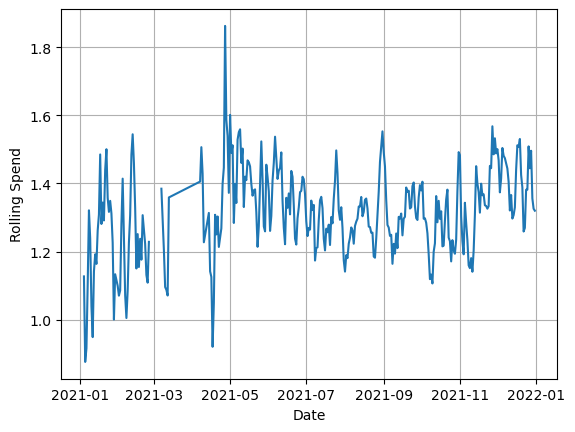

In [57]:
grouped21_romi_indx.loc[:,'rolling_romi'] = grouped21_romi_indx['romi'].rolling(window = 3).mean()
plt.plot('ad_date', 'rolling_romi', data = grouped21_romi_indx)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Rolling Spend')
plt.show()

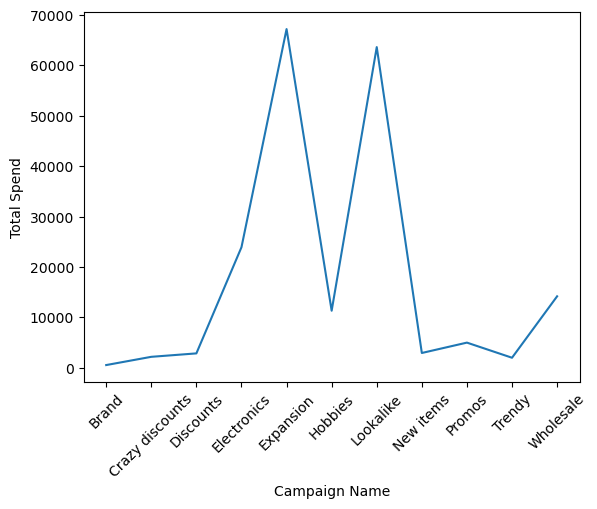

In [79]:
grouped_camp_spend = facebook_set.groupby(by = 'campaign_name')['total_spend'].sum()
fig, ax = plt.subplots()
grouped_camp_spend.plot(kind = 'line')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spend')
plt.xticks(rotation = 45)
ax.set_xticks(range(len(grouped_camp_spend.index)))
ax.set_xticklabels(grouped_camp_spend.index)
plt.show()

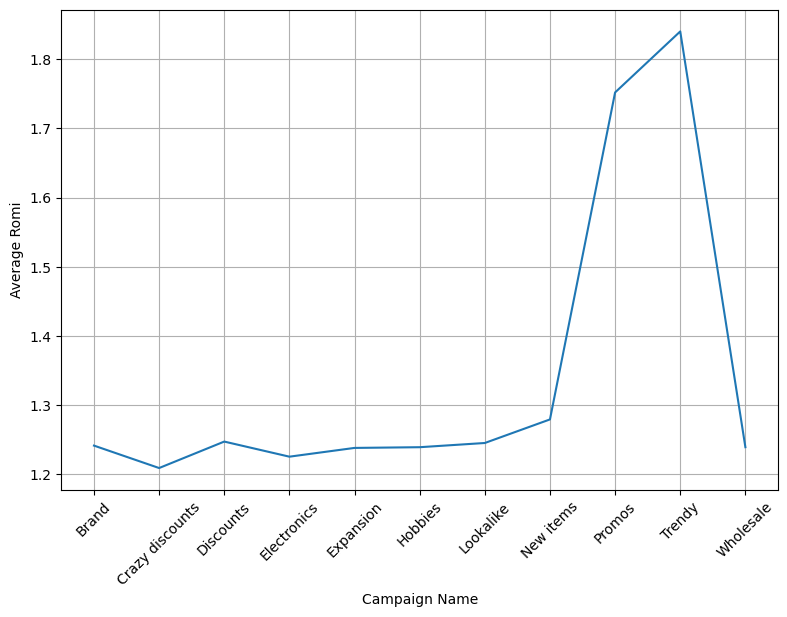

In [47]:

fig, ax = plt.subplots(figsize = (8,6))
grouped_camp_romi = facebook_set.groupby(by = 'campaign_name')['romi'].mean()
grouped_camp_romi.plot(kind = 'line')
plt.xlabel('Campaign Name')
plt.ylabel('Average Romi')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
ax.set_xticks(range(len(grouped_camp_romi.index)))
ax.set_xticklabels(grouped_camp_romi.index)
plt.show()

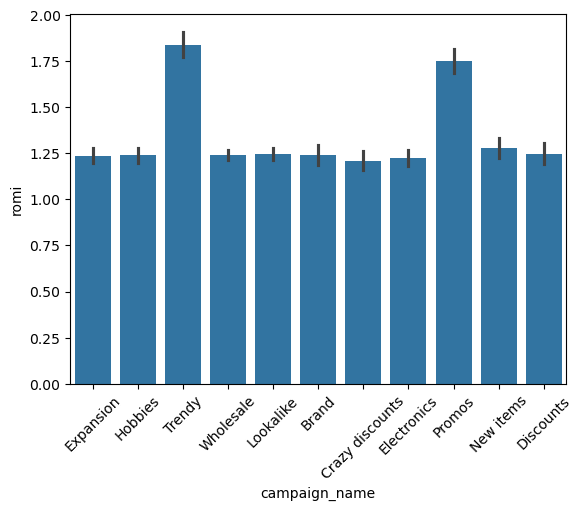

In [61]:
import seaborn as sns
sns.barplot(facebook_set, x = 'campaign_name', y = 'romi')
plt.xticks(rotation = 45)
plt.show()

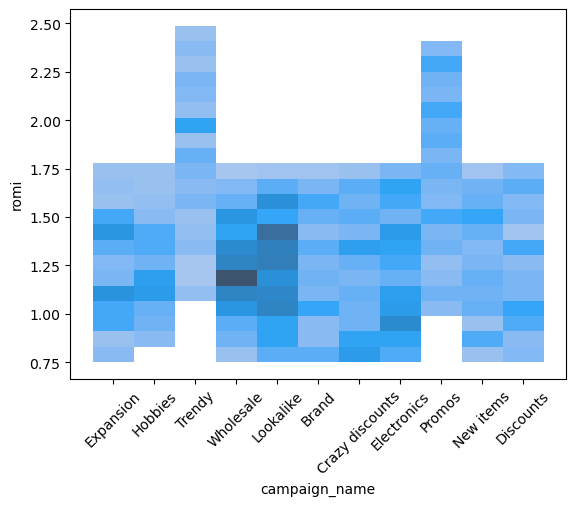

In [81]:
sns.histplot(data = facebook_set, x = 'campaign_name', y = 'romi')
plt.xticks(rotation = 45)
plt.show()

<Axes: >

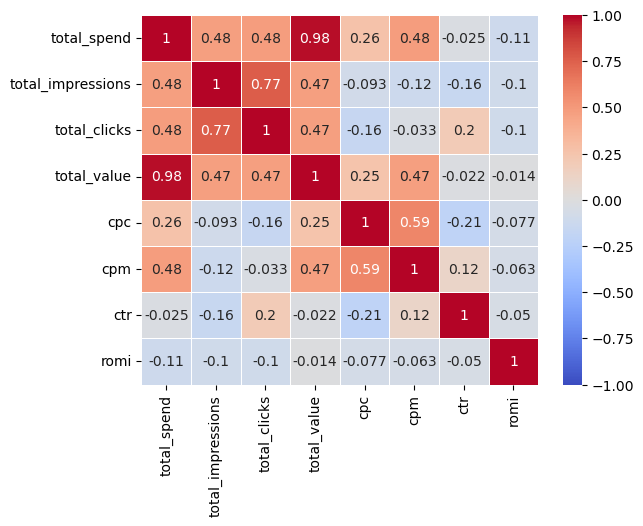

In [89]:
corr_set = facebook_set[[ 'total_spend', 'total_impressions', 'total_clicks', 'total_value', 'cpc', 'cpm', 'ctr', 'romi']]
corr_mat = corr_set.corr()
sns.heatmap(corr_mat, annot = True, cmap='coolwarm',  vmin=-1, vmax=1, linewidths=0.5)

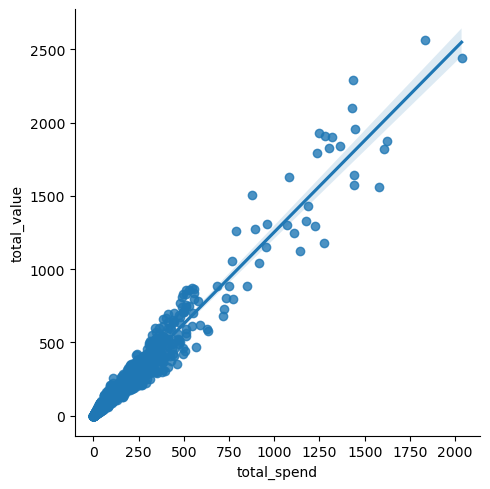

In [45]:
sns.lmplot(x = 'total_spend', y = 'total_value', data = facebook_set)